In [1]:
%load_ext autoreload
%autoreload 2

from model import hg, Drosophila2DPose
from parser import create_parser
import torch


checkpoint_path = '/home/user/Desktop/DeepFly3D/weights/sh8_deepfly.tar'
args = create_parser().parse_args('')

model = Drosophila2DPose(hg(
    num_stacks=args.stacks,
    num_blocks=args.blocks,
    num_classes=19,
    num_feats=args.features,
    inplanes=args.inplanes,
    init_stride=args.stride,
)).cuda()

pretrained = {k.replace('module.',''):v for (k,v) in torch.load(checkpoint_path)['state_dict'].items()}
_ = model.load_state_dict(pretrained, strict=False)



In [2]:
from inference import path2inp
from dataset import Drosophila2Dataset
from torch.utils.data import DataLoader

image_path = '/home/user/Desktop/DeepFly3D/data/test/'
inp = path2inp(image_path) # extracts list of images under the folder
dat = DataLoader(Drosophila2Dataset(inp), batch_size=8)


/home/user/anaconda3/envs/sspose/lib/python3.8/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):
[('/home/user/Desktop/DeepFly3D/data/test/camera_0_img_000002.jpg', '/home/user/Desktop/DeepFly3D/data/test/camera_1_img_000002.jpg', '/home/user/Desktop/DeepFly3D/data/test/camera_6_img_000006.jpg', '/home/user/Desktop/DeepFly3D/data/test/camera_0_img_000004.jpg', '/home/user/Desktop/DeepFly3D/data/test/camera_1_img_000003.jpg', '/home/user/Desktop/DeepFly3D/data/test/camera_4_img_000002.jpg', '/home/user/Desktop/DeepFly3D/data/test/camera_0_img_000014.jpg', '/home/user/Desktop/DeepFly3D/data/test/camera_0_img_000003.jpg'), tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0.,

In [12]:
from inference import inference
points2d = inference(model, dat)

In [11]:
points2d.shape

(7, 15, 19, 2)

In [22]:
from inference import parse_img_path
[parse_img_path(points2d[idx][0]) for idx in range(105)]

camera_0_img_000002.jpg
camera_1_img_000002.jpg
camera_6_img_000006.jpg
camera_0_img_000004.jpg
camera_1_img_000003.jpg
camera_4_img_000002.jpg
camera_0_img_000014.jpg
camera_0_img_000003.jpg
camera_5_img_000005.jpg
camera_2_img_000004.jpg
camera_4_img_000009.jpg
camera_6_img_000002.jpg
camera_0_img_000012.jpg
camera_6_img_000013.jpg
camera_0_img_000005.jpg
camera_3_img_000000.jpg
camera_1_img_000013.jpg
camera_5_img_000009.jpg
camera_2_img_000003.jpg
camera_4_img_000013.jpg
camera_6_img_000014.jpg
camera_5_img_000000.jpg
camera_1_img_000007.jpg
camera_6_img_000011.jpg
camera_3_img_000006.jpg
camera_4_img_000014.jpg
camera_6_img_000008.jpg
camera_0_img_000009.jpg
camera_6_img_000007.jpg
camera_0_img_000006.jpg
camera_1_img_000000.jpg
camera_4_img_000012.jpg
camera_0_img_000000.jpg
camera_5_img_000011.jpg
camera_0_img_000011.jpg
camera_3_img_000008.jpg
camera_5_img_000007.jpg
camera_3_img_000001.jpg
camera_3_img_000010.jpg
camera_6_img_000003.jpg
camera_1_img_000008.jpg
camera_5_img_000

[(0, 2),
 (1, 2),
 (6, 6),
 (0, 4),
 (1, 3),
 (4, 2),
 (0, 14),
 (0, 3),
 (5, 5),
 (2, 4),
 (4, 9),
 (6, 2),
 (0, 12),
 (6, 13),
 (0, 5),
 (3, 0),
 (1, 13),
 (5, 9),
 (2, 3),
 (4, 13),
 (6, 14),
 (5, 0),
 (1, 7),
 (6, 11),
 (3, 6),
 (4, 14),
 (6, 8),
 (0, 9),
 (6, 7),
 (0, 6),
 (1, 0),
 (4, 12),
 (0, 0),
 (5, 11),
 (0, 11),
 (3, 8),
 (5, 7),
 (3, 1),
 (3, 10),
 (6, 3),
 (1, 8),
 (5, 14),
 (2, 8),
 (4, 0),
 (5, 4),
 (4, 4),
 (2, 12),
 (4, 8),
 (3, 2),
 (6, 0),
 (6, 12),
 (4, 3),
 (0, 10),
 (3, 4),
 (2, 7),
 (1, 11),
 (5, 10),
 (5, 8),
 (4, 11),
 (2, 9),
 (5, 2),
 (3, 7),
 (3, 5),
 (3, 11),
 (4, 5),
 (5, 13),
 (5, 12),
 (0, 13),
 (1, 14),
 (6, 1),
 (3, 3),
 (3, 13),
 (1, 12),
 (1, 10),
 (3, 9),
 (5, 6),
 (2, 2),
 (1, 6),
 (1, 4),
 (4, 6),
 (6, 4),
 (5, 3),
 (4, 10),
 (2, 14),
 (0, 1),
 (1, 5),
 (6, 5),
 (1, 1),
 (3, 14),
 (2, 6),
 (0, 7),
 (2, 5),
 (2, 1),
 (2, 11),
 (5, 1),
 (6, 10),
 (2, 13),
 (1, 9),
 (3, 12),
 (2, 10),
 (2, 0),
 (4, 7),
 (4, 1),
 (6, 9),
 (0, 8)]

In [6]:
from inference import parse_img_path
parse_img_path('/home/user/Desktop/DeepFly3D/data/test/camera_0_img_000001.jpg')

(0, 1)

In [6]:
points2d.shape

AttributeError: 'list' object has no attribute 'shape'

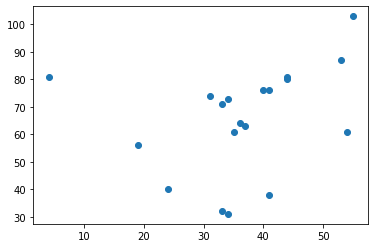

In [58]:
plt.scatter(pts[:,0], pts[:,1])

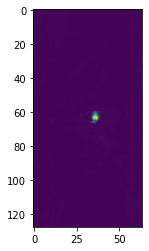

In [42]:
import matplotlib.pyplot as plt
plt.imshow(out[-1][0,6].cpu().data.numpy())

In [23]:
import numpy as np
hm = out[-1].cpu().data.numpy()
np.unravel_index(hm.argmax(), hm.shape)

np.argmax(, axis=(-1, -2))

SyntaxError: invalid syntax (317243416.py, line 5)

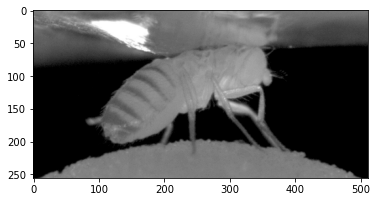

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')